# "Парсинг вакансий-LinkedIn для аналитика данных и BI аналитика  в EU"

## Описание проекта


**1. Распарсить предоставленный csv файл с помощью BS 4, создав следующие признаки:**
- наименование вакансии
- город
- страна
- тип занятости (online, hybride, on-site)
- компания
- размер компании (количество работников)
- сфера деятельности компании
- требуемые хард скилы
- дата публикации вакансии
- количество кандидатов на вакансию


**2. Подготовка данных к визуализации:**
- фильтрация датафрейма с оставлением только вакансий для аналитиков данных и BI аналитиков
- удаление дубликатов
- удаление ненужных атрибутов (признаков)

**3. Визуализация данных:**
- построение интерактивного дашборда в Tableau.

## Парсинг и предобработка данных

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import requests
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('\datasets\masterskaya_yandex_2022_09_07.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  772 non-null    int64 
 1   html        772 non-null    object
dtypes: int64(1), object(1)
memory usage: 12.2+ KB


In [4]:
elem = df['html'][0]
elem

'\n  <div>\n    <div class="\n        jobs-details__main-content jobs-details__main-content--single-pane full-width\n        ">\n        \n<!---->\n      \n<!---->\n      <div>\n        <div class="jobs-unified-top-card t-14">\n  <div class="relative">\n\n    <div class="jobs-unified-top-card__content--two-pane">\n<!---->\n        <a href="/jobs/view/3258155313/?alternateChannel=search&amp;refId=xQWMq5sHxPa4BOVKDp0TKg%3D%3D&amp;trackingId=grGqx%2FHW0EZ%2BorBvEr%2Ft%2Bg%3D%3D&amp;trk=d_flagship3_search_srp_jobs" id="ember464" class="ember-view">\n          <h2 class="t-24 t-bold jobs-unified-top-card__job-title">Stage - Assistant Ingénieur Qualité - Beyrand (H/F)</h2>\n        </a>\n\n      <div class="jobs-unified-top-card__primary-description">\n          <span class="jobs-unified-top-card__subtitle-primary-grouping t-black">\n            <span class="jobs-unified-top-card__company-name">\n                  <a href="/company/hermes-group/life/" id="ember465" class="ember-view t-black 

In [5]:
soup = BeautifulSoup(elem)

In [6]:
soup.find('h2')

<h2 class="t-24 t-bold jobs-unified-top-card__job-title">Stage - Assistant Ingénieur Qualité - Beyrand (H/F)</h2>

In [7]:
soup.find('h2').text

'Stage - Assistant Ingénieur Qualité - Beyrand (H/F)'

In [8]:
soup.find('h2').text.strip()

'Stage - Assistant Ingénieur Qualité - Beyrand (H/F)'

### Вакансии

In [9]:
# добавим вакансии в датафрейм
df['vacancy'] = df['html'].apply(lambda x:  BeautifulSoup(x).find('h2').text.strip())
df.sample()

,Unnamed: 0,html,vacancy
373,373,"\n <div>\n <div class=""\n jobs-deta...",Data Engineer - Platform Foundations


### Количество соискателей

In [10]:
# добавим кол-во соискателей
def get_candidats(cell):
    try:
        return BeautifulSoup(cell).find('span', class_ = 'jobs-unified-top-card__applicant-count').text.strip().replace(' applicants', '')
    except:
        return np.nan
    
df['candidats'] = df['html'].apply(get_candidats) 
# преобразуем столбец в числовой
df['candidats'] = pd.to_numeric(df['candidats'], errors='coerce')
df.sample()

,Unnamed: 0,html,vacancy,candidats
508,508,"\n <div>\n <div class=""\n jobs-deta...",Analyste Data H/F,4.0


### Ссылка на вакансию

In [11]:
BeautifulSoup(df['html'][0]).find('a').get('href')

'/jobs/view/3258155313/?alternateChannel=search&refId=xQWMq5sHxPa4BOVKDp0TKg%3D%3D&trackingId=grGqx%2FHW0EZ%2BorBvEr%2Ft%2Bg%3D%3D&trk=d_flagship3_search_srp_jobs'

In [12]:
'https://linkedin.com' + BeautifulSoup(df['html'][0]).find('a').get('href')

'https://linkedin.com/jobs/view/3258155313/?alternateChannel=search&refId=xQWMq5sHxPa4BOVKDp0TKg%3D%3D&trackingId=grGqx%2FHW0EZ%2BorBvEr%2Ft%2Bg%3D%3D&trk=d_flagship3_search_srp_jobs'

In [13]:
# добавим ссылку на вакансию
df['link'] = df['html'].apply(lambda x: "https://linkedin.com" + BeautifulSoup(x).find('a').get('href'))
df.sample()

,Unnamed: 0,html,vacancy,candidats,link
352,352,"\n <div>\n <div class=""\n jobs-deta...",Junior Data Engineer,40.0,https://linkedin.com/jobs/view/3247065283/?alt...


### Геоданные

In [14]:
# добавим геоданные
def get_geo(cell):
    try:
        return BeautifulSoup(cell).find('span', class_ = 'jobs-unified-top-card__bullet').text.strip()
    except:
        return np.nan
    
df['geo'] = df['html'].apply(get_geo)    
df.sample()

,Unnamed: 0,html,vacancy,candidats,link,geo
203,203,"\n <div>\n <div class=""\n jobs-deta...",MACHINE LEARNING ENGINEER,43.0,https://linkedin.com/jobs/view/3247038075/?alt...,"Laakdal, Flemish Region, Belgium"


### Город

In [15]:
# выделим город в геоданных
def get_city(cell):
    if len(cell.split(',')) > 1:
        return cell.split(',')[0].strip()
    elif "Metropolitan" in cell or "Greater" in cell:
        return cell.replace('Greater', '').replace('Metropolitan', '').replace('Area', '').replace('Region','').strip()
    else:
        return np.nan
    
# добавим город в датафрейм
df['city'] = df['geo'].apply(get_city)
df.sample()

,Unnamed: 0,html,vacancy,candidats,link,geo,city
197,197,"\n <div>\n <div class=""\n jobs-deta...",Data Analyst,15.0,https://linkedin.com/jobs/view/3249145337/?alt...,"Surrey, England, United Kingdom",Surrey


In [16]:
df['city'].nunique()

343

### Страна

In [17]:
# выделим страну из геоданных
def get_country(cell):
    if len(cell.split(',')) > 1:
        return cell.split(',')[-1].strip()
    elif "Metropolitan" in cell or "Greater" in cell or "Region" in cell:
        return np.nan
    else:
        return cell
    
# добавим страну в датафрейм
df['country'] = df['geo'].apply(get_country)
df.sample()

,Unnamed: 0,html,vacancy,candidats,link,geo,city,country
297,297,"\n <div>\n <div class=""\n jobs-deta...",Data Analytics Analyst,7.0,https://linkedin.com/jobs/view/3249425849/?alt...,"Hove, England, United Kingdom",Hove,United Kingdom


In [18]:
df['country'].nunique()

31

In [19]:
df['country'].value_counts()

France                     168
Germany                     96
United Kingdom              81
Italy                       56
Spain                       52
Netherlands                 40
Poland                      39
Sweden                      29
Ireland                     20
Belgium                     17
Slovakia                    17
Portugal                    15
Switzerland                 12
Norway                      12
Finland                     11
Czechia                     10
Denmark                      9
Hungary                      9
Romania                      9
Bulgaria                     4
Croatia                      4
Slovenia                     4
Greece                       2
Austria                      2
Ukraine                      2
Gibraltar                    1
Luxembourg                   1
Estonia                      1
Lithuania                    1
Italy Metropolitan Area      1
Serbia                       1
Name: country, dtype: int64

**343 города из 31 страны, а в ЕС 27. Gibraltar, Ukraine, Serbia, Italy Metropolitan Area, nan  - не совсем члены ЕС))**

In [20]:
# заменим значение
df['country'] = df['country'].replace('Italy Metropolitan Area', 'Italy')

In [21]:
print('Пропущено стран:', df['country'].isna().sum())

Пропущено стран: 46


In [22]:
print('Пропущено городов:', df['city'].isna().sum())

Пропущено городов: 64


### Заполним страны по городам

In [23]:
df.query('country != country')

,Unnamed: 0,html,vacancy,candidats,link,geo,city,country
9,9,"\n <div>\n <div class=""\n jobs-deta...",Data Engineer (with Python),18.0,https://linkedin.com/jobs/view/3247820547/?alt...,Wroclaw Metropolitan Area,Wroclaw,NaN
11,11,"\n <div>\n <div class=""\n jobs-deta...",Data Analyst,NaN,https://linkedin.com/jobs/view/3257247449/?alt...,Przemyśl Metropolitan Area,Przemyśl,NaN
21,21,"\n <div>\n <div class=""\n jobs-deta...",Junior Data Scientist,76.0,https://linkedin.com/jobs/view/3256742948/?alt...,Wroclaw Metropolitan Area,Wroclaw,NaN
28,28,"\n <div>\n <div class=""\n jobs-deta...",Data Analyst,3.0,https://linkedin.com/jobs/view/3257240118/?alt...,Grudziadz Metropolitan Area,Grudziadz,NaN
31,31,"\n <div>\n <div class=""\n jobs-deta...",Online Data Analyst | Flexible Work,23.0,https://linkedin.com/jobs/view/3256368280/?alt...,Greater Norrköping Metropolitan Area,Norrköping,NaN
33,33,"\n <div>\n <div class=""\n jobs-deta...",Data Analyst,7.0,https://linkedin.com/jobs/view/3257248741/?alt...,Radom Metropolitan Area,Radom,NaN
36,36,"\n <div>\n <div class=""\n jobs-deta...",Data Analyst,5.0,https://linkedin.com/jobs/view/3257250927/?alt...,Zamosc Metropolitan Area,Zamosc,NaN
37,37,"\n <div>\n <div class=""\n jobs-deta...",Online Data Analyst | REMOTE OPPORTUNITY,30.0,https://linkedin.com/jobs/view/3257414261/?alt...,Greater Edinburgh Area,Edinburgh,NaN
59,59,"\n <div>\n <div class=""\n jobs-deta...",(Junior) Financial Data Scientist (w/m/d),32.0,https://linkedin.com/jobs/view/3246865514/?alt...,Berlin Metropolitan Area,Berlin,NaN
72,72,"\n <div>\n <div class=""\n jobs-deta...",Remote| Data Analyst,7.0,https://linkedin.com/jobs/view/3255007949/?alt...,Lodz Metropolitan Area,Lodz,NaN


In [24]:
# заполним значения стран известными нам городами
df['country'].fillna(df['city'], inplace=True)

In [25]:
# заполним страны по названию городов
df.loc[df['country'].isin(['Athens']), 'country'] = 'Greece'
df.loc[df['country'].isin(['Bucharest']), 'country'] = 'Romania'
df.loc[df['country'].isin(['Edinburgh']), 'country'] = 'United Kingdom'
df.loc[df['country'].isin(['Zurich']), 'country'] = 'Switzerland'
df.loc[df['country'].isin(['Norrköping']), 'country'] = 'Sweden'
df.loc[df['country'].isin([ 'Nantes', 'Paris']), 'country'] = 'France'
df.loc[df['country'].isin(['Barcelona', 'Cáceres', 'Gijón', 'Valencia']), 'country'] = 'Spain'
df.loc[df['country'].isin([ 'Bologna', 'Genoa', 'Milan', 'Modena', 'Rome', 'Turin']), 'country'] = 'Italy'
df.loc[df['country'].isin(['Berlin', 'Cologne Bonn', 'Hannover-Braunschweig-Göttingen-Wolfsburg']), 'country'] = 'Germany'
df.loc[df['country'].isin([ 'Gdansk', 'Grudziadz', 'Lodz', 'Przemyśl', 'Radom', 'Warsaw', 'Wroclaw', 'Zamosc']), 'country'] = 'Poland'
df.loc[df['country'].isin(['Antwerp', 'Bruges', 'Brussels', 'Ghent', 'Kortrijk', 'Liege', 'Louvain', 'Mons', 'Namur']), 'country'] = 'Belgium'
# заполним вручную
df['country'][424] = 'Germany'
df['country'][671] = 'Germany'

### Описание

In [26]:
# добавим описание
df['description'] = df['html'].apply(lambda x: BeautifulSoup(x).find('div', {'id':'job-details'}).text.strip())

In [27]:
df.head()

,Unnamed: 0,html,vacancy,candidats,link,geo,city,country,description
0,0,"\n <div>\n <div class=""\n jobs-deta...",Stage - Assistant Ingénieur Qualité - Beyrand ...,NaN,https://linkedin.com/jobs/view/3258155313/?alt...,"Limoges, Nouvelle-Aquitaine, France",Limoges,France,"LA SOCIETE : \nCréée en 1926, la société Beyra..."
1,1,"\n <div>\n <div class=""\n jobs-deta...","développeur matlab/simulink, secteur automobil...",6.0,https://linkedin.com/jobs/view/3249651625/?alt...,"Toulouse, Occitanie, France",Toulouse,France,Dans le cadre de la croissance de nos activité...
2,2,"\n <div>\n <div class=""\n jobs-deta...",Online Data Analyst,12.0,https://linkedin.com/jobs/view/3248499929/?alt...,"Skara, Vastra Gotaland County, Sweden",Skara,Sweden,TELUS International AI-Data Solutions partners...
3,3,"\n <div>\n <div class=""\n jobs-deta...",Online Data Analyst - Belgium,11.0,https://linkedin.com/jobs/view/3248879065/?alt...,"West Flanders, Flemish Region, Belgium",West Flanders,Belgium,TELUS International AI-Data Solutions partners...
4,4,"\n <div>\n <div class=""\n jobs-deta...",Data Analyst,2.0,https://linkedin.com/jobs/view/3257222954/?alt...,"Mecklenburg-West Pomerania, Germany",Mecklenburg-West Pomerania,Germany,TELUS International AI-Data Solutions partners...


### Название компании

In [28]:
# добавим название компании
def get_company(cell):
    try:
        return BeautifulSoup(cell).find('span', class_ = 'jobs-unified-top-card__company-name').text.strip()
    except:
        return np.nan

In [29]:
df['company'] = df['html'].apply(get_company)

In [30]:
df.sample()

,Unnamed: 0,html,vacancy,candidats,link,geo,city,country,description,company
66,66,"\n <div>\n <div class=""\n jobs-deta...",Data analyst | Deals (M&A) | CDI | H/F,33.0,https://linkedin.com/jobs/view/3256393640/?alt...,"Neuilly-sur-Seine, Île-de-France, France",Neuilly-sur-Seine,France,"Chez PwC, nous croisons les approches et multi...",PwC France


### Тип занятости

In [31]:
def get_type_of_employment(cell):
    try:
        return BeautifulSoup(cell).find('span', class_ = 'jobs-unified-top-card__workplace-type').text.strip()
    except:
        return np.nan
    
df['type_of_employment'] = df['html'].apply(get_type_of_employment)   
df['type_of_employment'].value_counts()

On-site    312
Remote     201
Hybrid     128
Name: type_of_employment, dtype: int64

### Дата размещения вакансии

In [32]:
%%time
def get_job_date(cell):
    try:
        return BeautifulSoup(cell).find('span', class_ = 'jobs-unified-top-card__posted-date').text.strip()
    except:
        return np.nan
    
df['job_date'] = df['html'].apply(get_job_date)  

CPU times: total: 4.78 s
Wall time: 4.79 s


In [33]:
def date_time(cell):
    if 'min' in cell:
        for i in cell.split():
            if i.isdigit():
                cell = datetime(2022, 9, 7, 17) - timedelta(minutes=int(i))
                return cell
    if 'hour' in cell:
        for i in cell.split():
            if i.isdigit():
                cell = datetime(2022, 9, 7, 17) - timedelta(hours=int(i))
                return cell
    else:
        for i in cell.split():
            if i.isdigit():
                cell = datetime(2022, 9, 7, 17) - timedelta(days=int(i))
                return cell
            
df['job_date'] = df['job_date'].apply(date_time)
df.sample()            

,Unnamed: 0,html,vacancy,candidats,link,geo,city,country,description,company,type_of_employment,job_date
20,20,"\n <div>\n <div class=""\n jobs-deta...",(Junior) Data Scientist (m/w/d),35.0,https://linkedin.com/jobs/view/3256968344/?alt...,"Bad Wimpfen, Baden-Württemberg, Germany",Bad Wimpfen,Germany,Bei Lidl arbeiten heißt: die Zukunft des Hande...,Lidl in Germany,Hybrid,2022-09-07 12:00:00


In [34]:
df['job_date'].describe()

count                     772
unique                     35
top       2022-09-06 17:00:00
freq                      151
first     2022-09-01 17:00:00
last      2022-09-07 16:56:00
Name: job_date, dtype: object

### Размер компании

In [35]:
soup.find('div', class_ = 'mt5 mb2').find_all('li', class_ ='jobs-unified-top-card__job-insight')[1].text.strip('·')[11:28]

'10,001+ employees'

In [36]:
def get_company_size(cell):
    try:
        return BeautifulSoup(cell).find('div', class_ = 'mt5 mb2').find_all('li', class_ ='jobs-unified-top-card__job-insight')[1].text.strip().split(' ·')[0]
    except:
        return np.nan
    
df['company_size'] = df['html'].apply(get_company_size)    

In [37]:
# заменим employees
df['company_size'] = df['company_size'].str.replace(' employees', '')

In [38]:
df.sample()

,Unnamed: 0,html,vacancy,candidats,link,geo,city,country,description,company,type_of_employment,job_date,company_size
458,458,"\n <div>\n <div class=""\n jobs-deta...",Junior Market Data Analyst,14.0,https://linkedin.com/jobs/view/3243271990/?alt...,"Sofia, Sofia City, Bulgaria",Sofia,Bulgaria,Country\n\nBulgaria\n\nJob Family\n\nOperation...,GfK,NaN,2022-09-02 17:00:00,"5,001-10,000"


### Деятельность компании

In [39]:
soup.find_all('li', class_ ='jobs-unified-top-card__job-insight')[1].text.strip().split(' ·')[1]

' Retail Luxury Goods and Jewelry'

In [40]:
%%time
# добавим деятельность компании
def get_company_activity(cell):
    try:
        return BeautifulSoup(cell).find_all('li', class_ ='jobs-unified-top-card__job-insight')[1].text.strip().split(' ·')[1]
    except:
        return np.nan
    
df['company_activity'] = df['html'].apply(get_company_activity)    
df.sample()

CPU times: total: 5.39 s
Wall time: 5.37 s


,Unnamed: 0,html,vacancy,candidats,link,geo,city,country,description,company,type_of_employment,job_date,company_size,company_activity
44,44,"\n <div>\n <div class=""\n jobs-deta...",Data Analyst (IT),4.0,https://linkedin.com/jobs/view/3254949074/?alt...,"Basel, Basel, Switzerland",Basel,Switzerland,Are you experienced in lab automation and data...,Randstad Switzerland,NaN,2022-09-07 01:00:00,201-500,Staffing and Recruiting


In [41]:
df.drop_duplicates(inplace=True)

### Отфильтруем вакансии

In [42]:
df = df[df['vacancy'].str.contains('Analyst|BI', case=True)]

### Скиллы

In [43]:
# список скиллов
skills = (['datahub', 'api', 'github', 'google analytics', 'adobe analytics', 'ibm coremetrics', 'omniture'
            'gitlab', 'erwin', 'hadoop', 'spark', 'hive'
           'databricks', 'aws', 'gcp', 'azure','excel',
            'redshift', 'bigquery', 'snowflake',  'hana'
            'grafana', 'kantar', 'spss', 
           'asana', 'basecamp', 'jira', 'dbeaver','trello', 'miro', 'salesforce', 
           'rapidminer', 'thoughtspot',  'power point',  'docker', 'jenkins','integrate.io', 'talend', 'apache nifi','aws glue','pentaho','google data flow',
             'azure data factory','xplenty','skyvia','iri voracity','xtract.io','dataddo', 'ssis',
             'hevo data','informatica','oracle data integrator','k2view','cdata sync','querysurge', 
             'rivery', 'dbconvert', 'alooma', 'stitch', 'fivetran', 'matillion','streamsets','blendo',
             'iri voracity','logstash', 'etleap', 'singer', 'apache camel','actian', 'airflow', 'luidgi', 'datastage',
           'python', 'vba', 'scala', ' r ', 'java script', 'julia', 'sql', 'matlab', 'java', 'html', 'c++', 'sas',
           'data studio', 'tableau', 'looker', 'powerbi', 'cognos', 'microstrategy', 'spotfire',
             'sap business objects','microsoft sql server', 'oracle business intelligence', 'yellowfin',
             'webfocus','sas visual analytics', 'targit', 'izenda',  'sisense', 'statsbot', 'panorama', 'inetsoft',
             'birst', 'domo', 'metabase', 'redash', 'power bi', 'alteryx', 'dataiku', 'qlik sense', 'qlikview'
          ]) 

In [44]:
# добавим скиллы
def get_skills(cell):
    list_skills = []
    for skill in skills:
        if skill in cell.lower().replace('powerbi', 'power bi'):
            list_skills.append(skill)
    return list_skills

df['skills'] = df.description.apply(get_skills)

# преобразуем список в строку
df = df.explode('skills')
df.sample(5)

,Unnamed: 0,html,vacancy,candidats,link,geo,city,country,description,company,type_of_employment,job_date,company_size,company_activity,skills
229,229,"\n <div>\n <div class=""\n jobs-deta...",Material Data Analyst,35.0,https://linkedin.com/jobs/view/3246454352/?alt...,"Drogheda, County Louth, Ireland",Drogheda,Ireland,Position Overview\nYour key responsibility wil...,The Coca-Cola Company,On-site,2022-09-01 17:00:00,"10,001+",Food and Beverage Services,power bi
518,518,"\n <div>\n <div class=""\n jobs-deta...",People Systems and Data Analyst,NaN,https://linkedin.com/jobs/view/3254301296/?alt...,"Pontypridd, Wales, United Kingdom",Pontypridd,United Kingdom,This job is sourced from a job board.\n L...,FaulknerScott,On-site,2022-09-06 18:00:00,11-50,Staffing and Recruiting,excel
86,86,"\n <div>\n <div class=""\n jobs-deta...",Data Analyst in Forensic Technology Services team,32.0,https://linkedin.com/jobs/view/3196639905/?alt...,"Prague, Prague, Czechia",Prague,Czechia,Job Description & Summary\n\nAbout the Forensi...,PwC Czech Republic,On-site,2022-09-05 17:00:00,"1,001-5,000",Business Consulting and Services,r
120,120,"\n <div>\n <div class=""\n jobs-deta...",Technology Strategy & Advisory Junior Analyst,13.0,https://linkedin.com/jobs/view/3254963939/?alt...,"Milan, Lombardy, Italy",Milan,Italy,"Perché assistere al cambiamento, quando puoi g...",Accenture Italia,On-site,2022-09-07 02:00:00,"10,001+",IT Services and IT Consulting,informatica
135,135,"\n <div>\n <div class=""\n jobs-deta...",Junior Business Analyst (m/f/d),29.0,https://linkedin.com/jobs/view/3249878466/?alt...,"Munich, Bavaria, Germany",Munich,Germany,ABOUT USryd is a FinTech company operating Eur...,ryd,Hybrid,2022-09-07 14:00:00,51-200,IT Services and IT Consulting,api


### Отфильтруем датафрейм

In [45]:
df = df[['vacancy', 'company', 'skills', 'city', 'country',  'type_of_employment', 'candidats', 'company_size', 'company_activity', 'link', 'job_date']]              
df.sample(10)

,vacancy,company,skills,city,country,type_of_employment,candidats,company_size,company_activity,link,job_date
465,"Data Analyst, Banking & Insurance",CGI,ssis,Espoo,Finland,On-site,2.0,"10,001+",IT Services and IT Consulting,https://linkedin.com/jobs/view/3255516425/?alt...,2022-09-05 17:00:00
262,Junior Data Analyst,Amazon,excel,Barcelona,Spain,NaN,NaN,"10,001+","Technology, Information and Internet",https://linkedin.com/jobs/view/3241673051/?alt...,2022-09-01 17:00:00
45,Data Analyst H/F,BNP Paribas,alteryx,Rueil-Malmaison,France,On-site,13.0,"10,001+",Banking,https://linkedin.com/jobs/view/3249874667/?alt...,2022-09-07 14:00:00
247,Data Analyst/Data-Analystin - IT Forensik (m/w/d),Landeskriminalamt Nordrhein-Westfalen,NaN,Düsseldorf,Germany,On-site,NaN,Government Administration,NaN,https://linkedin.com/jobs/view/3257346745/?alt...,2022-09-06 23:00:00
518,People Systems and Data Analyst,FaulknerScott,excel,Pontypridd,United Kingdom,On-site,NaN,11-50,Staffing and Recruiting,https://linkedin.com/jobs/view/3254301296/?alt...,2022-09-06 18:00:00
500,Data Analyst,Viceversa,python,Milan,Italy,Hybrid,147.0,1-10,NaN,https://linkedin.com/jobs/view/3246481429/?alt...,2022-09-01 17:00:00
187,"Data Analyst in Technology Team, Financial Cri...",PwC Polska,api,Gdańsk,Poland,On-site,11.0,"5,001-10,000",Business Consulting and Services,https://linkedin.com/jobs/view/3159752848/?alt...,2022-09-02 17:00:00
542,Junior Analyst (J12998),Pareto,excel,Tavira,Portugal,Remote,52.0,201-500,Staffing and Recruiting,https://linkedin.com/jobs/view/3248176207/?alt...,2022-09-02 17:00:00
135,Junior Business Analyst (m/f/d),ryd,sql,Munich,Germany,Hybrid,29.0,51-200,IT Services and IT Consulting,https://linkedin.com/jobs/view/3249878466/?alt...,2022-09-07 14:00:00
461,Data Analyst - Demand,Getaround,sql,Paris,France,NaN,88.0,201-500,"Technology, Information and Internet",https://linkedin.com/jobs/view/3180730881/?alt...,2022-09-07 08:00:00


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 2 to 760
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   vacancy             969 non-null    object        
 1   company             969 non-null    object        
 2   skills              869 non-null    object        
 3   city                930 non-null    object        
 4   country             969 non-null    object        
 5   type_of_employment  729 non-null    object        
 6   candidats           816 non-null    float64       
 7   company_size        966 non-null    object        
 8   company_activity    907 non-null    object        
 9   link                969 non-null    object        
 10  job_date            969 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 90.8+ KB


In [47]:
df.to_csv('linkedin_vacancy.csv', index=False)

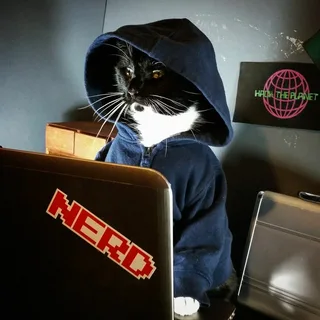